# Trabalhando com Arquivos do Excel

In [66]:
#Importando a biblioteca pandas
import pandas as pd
#importando a biblioteca de gráficos do Python
import matplotlib.pyplot as plt

In [3]:
#carregamento dos arquivos de dados
df1 = pd.read_excel("../datasets/Aracaju.xlsx")
df2 = pd.read_excel("../datasets/Fortaleza.xlsx")
df3 = pd.read_excel("../datasets/Natal.xlsx")
df4 = pd.read_excel("../datasets/Recife.xlsx")
df5 = pd.read_excel("../datasets/Salvador.xlsx")

In [113]:
#vendo o final do arquivo
df1.tail()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
#Unindo todos os arquivos em um único dataframe
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Mostrando as 10 primeiras linhas do dataframe completo
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [7]:
#mostrando as 15 últimas linhas
df.tail(15)

,Cidade,Data,Vendas,LojaID,Qtde
225,Salvador,2019-01-02,36.23,1035,1
226,Salvador,2019-01-02,38.32,1035,2
227,Salvador,2019-01-02,14.70,1035,1
228,Salvador,2019-01-02,6.87,1037,3
229,Salvador,2019-01-02,43.08,1036,2
230,Salvador,2019-01-03,184.69,1036,1
231,Salvador,2019-01-03,89.85,1034,2
232,Salvador,2019-01-03,167.76,1034,3
233,Salvador,2019-01-03,172.40,1036,2
234,Salvador,2019-01-03,48.39,1035,2


In [9]:
#sorteando aleatoriamente 8 amostras
df.sample(8)

,Cidade,Data,Vendas,LojaID,Qtde
60,Aracaju,2018-01-01,215.88,1521,3
81,Fortaleza,2019-01-01,10.68,1005,1
223,Salvador,2019-01-02,40.51,1037,2
141,Recife,2019-03-02,182.75,983,8
117,Natal,2019-01-02,39.41,1034,1
85,Recife,2019-01-01,182.52,983,1
24,Aracaju,2018-01-01,151.04,1522,6
80,Recife,2019-01-01,114.14,982,8


In [10]:
#Checando os tipos de dados das colunas do dataframe
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
#Convertendo a coluna LojaID em string
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [61]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


## Verificando e corrigindo os valores faltantes

In [14]:
#Linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#Substituindo os nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [16]:
df["Vendas"].mean()

122.61180089485438

In [17]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
#Preenchendo os nulos com zero
df["Vendas"].fillna(0, inplace=True)

In [19]:
#Removendo as linhas com nulos
df.dropna(inplace=True)

In [20]:
#Removendo as linhas com valores nulos presentes em em 1 determinada coluna
df.dropna(subset=["Vendas"], inplace=True)

In [21]:
#Excluindo as linhas que estejam com todos valores os valores nulo
df.dropna(how="all", inplace=True)

## Acrescentando novas colunas novas ao dataframe

In [23]:
#Calculando a receita e guardando em uma nova coluna
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
#outra coluna nova
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [121]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [26]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [27]:
##listando as 3 linhas com as maiores receitas do DF
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [28]:
#listando as 3 linhas com as menores receitas do DF
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
#Calculando a receita total por cidade usando o método gropyby
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
#Ordenando o conjunto de dados a partir do campo Receita em ordem decrescente
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### Trabalhando com datas no pandas

In [32]:
#mudando o tipo de dado da coluna de data para inteiro
df["Data"] = df["Data"].astype("int64")

C:\Users\moyse\AppData\Local\Temp/ipykernel_12296/3827482341.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


In [33]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [34]:
#alterando o tipo da coluna "Data" para datetime
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [35]:
#Calculando as receitas por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
#Adicionando uma nova coluna com o ano da venda
df["Ano_Venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,2018
44,Salvador,2019-01-01,43.26,1037,2,86.52,2.0,2019
216,Salvador,2019-01-02,5.82,1035,1,5.82,1.0,2019
48,Natal,2018-09-20,676.00,852,4,2704.00,4.0,2018
72,Fortaleza,2019-01-01,106.72,1003,4,426.88,4.0,2019


In [37]:
#separando em novas colunas o mês e o dia da venda
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
221,Salvador,2019-01-02,142.23,1035,2,284.46,2.0,2019,1,2
21,Fortaleza,2019-01-01,40.63,1004,3,121.89,3.0,2019,1,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2
67,Salvador,2019-01-01,36.89,1037,2,73.78,2.0,2019,1,1
160,Salvador,2019-01-02,11.76,1034,1,11.76,1.0,2019,1,2


In [38]:
#Encontrando a data mais antiga do dataframe
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [40]:
#Calculando a diferença de dias entre duas datas
df["difer_dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,difer_dias
110,Natal,2019-01-02,185.93,1036,3,557.79,3.0,2019,1,2,366 days
53,Aracaju,2018-01-01,8.64,1522,2,17.28,2.0,2018,1,1,0 days
225,Natal,2019-01-02,36.23,1035,1,36.23,1.0,2019,1,2,366 days
55,Recife,2019-01-01,20.03,983,4,80.12,4.0,2019,1,1,365 days
120,Salvador,2019-03-02,140.17,1036,2,280.34,2.0,2019,3,2,425 days


In [41]:
#Criando uma coluna com o trimestre da venda
df["trim_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,difer_dias,trim_venda
87,Natal,2019-01-02,135.19,1034,2,270.38,2.0,2019,1,2,366 days,1
38,Recife,2019-01-01,104.53,983,4,418.12,4.0,2019,1,1,365 days,1
21,Recife,2019-01-01,164.74,983,1,164.74,1.0,2019,1,1,365 days,1
217,Natal,2019-01-02,37.65,1036,2,75.30,2.0,2019,1,2,366 days,1
50,Recife,2019-01-01,7.24,983,4,28.96,4.0,2019,1,1,365 days,1


In [43]:
#Filtrando as vendas de março / 2019
vendas_marco_2019 = df.loc[(df["Data"].dt.month == 3) & (df["Data"].dt.year == 2019)]
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,difer_dias,trim_venda
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2.0,2019,3,30,453 days,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,1.0,2019,3,2,425 days,1
124,Fortaleza,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2.0,2019,3,2,425 days,1


In [52]:
#encontrando o somatorio de vendas por trimestre/ano
df.groupby(["Ano_Venda","trim_venda"])["Receita"].sum()

Ano_Venda  trim_venda
2018       1              71514.53
           2              23382.00
           3              11658.00
           4              11622.00
2019       1             221980.45
           2               6266.00
Name: Receita, dtype: float64

## Visualização dos dados com gráficos

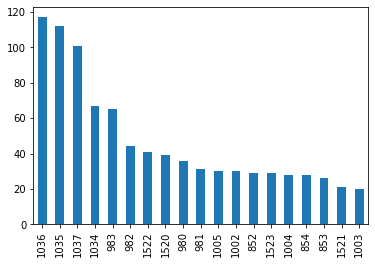

In [55]:
#quantidade de vendas por loja em ordem decrescente
df["LojaID"].value_counts(ascending=False).plot.bar();

<AxesSubplot:ylabel='Receita'>

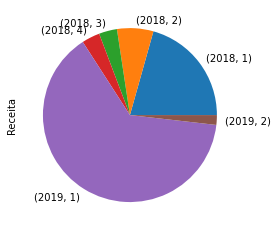

In [57]:
#Gráfico de Pizza das receitas por trimestre e ano
df.groupby(["Ano_Venda","trim_venda"])["Receita"].sum().plot.pie()

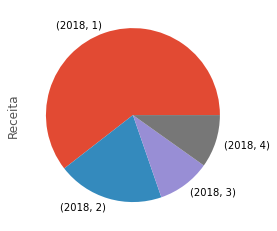

In [67]:
#Gráfico de Pizza das receitas por trimestre do ano 2018
#Alterando o estilo
plt.style.use("ggplot")
vendas_2018 = df.loc[(df["Data"].dt.year == 2018)]
vendas_2018.groupby(["Ano_Venda","trim_venda"])["Receita"].sum().plot.pie();

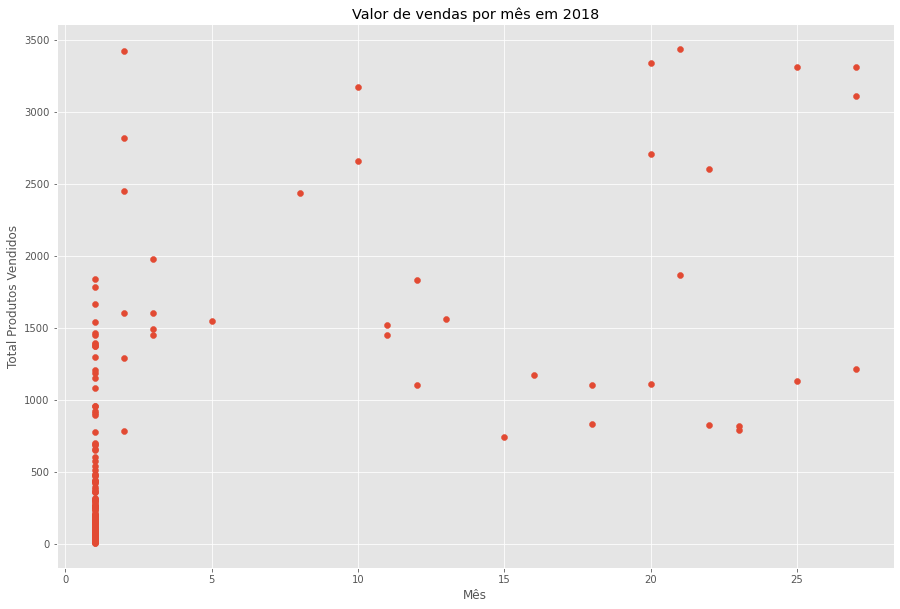

In [76]:
plt.rcParams["figure.figsize"] = (15,10) #aumentando o tamanho do gráfico
plt.scatter(x=vendas_2018["dia_venda"], y = vendas_2018["Receita"]);
plt.title("Valor de vendas por mês em 2018")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");


# Análise exploratória dos dados
### Usando o banco de dados da Microsoft *AdventureWorks* em formato excel


In [77]:
#Criando nosso DataFrame dfAW
dfAW = pd.read_excel("../datasets/AdventureWorks.xlsx")

In [80]:
#Verificando a quantidade de linhas e colunas
dfAW.shape

(904, 16)

In [81]:
#checando os tipos de dados das colunas
dfAW.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [82]:
#Qual a Receita total do dataframe?
dfAW["Valor Venda"].sum()

5984606.1426

In [83]:
#Qual o custo Total dos produtos? atribuindo esse valor a uma nova coluna
dfAW["custo_tot"] = dfAW["Custo Unitário"].mul(dfAW["Quantidade"]) 
#ou assim
dfAW["custo_tot"] = dfAW["Custo Unitário"] * dfAW["Quantidade"]
dfAW.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo_tot
247,2008-06-02,2008-06-08,306,2496,19052,200806025CS576,5.09,9.99,240,0.0,2397.6,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,1221.60
588,2009-08-01,2009-08-09,199,1202,18974,200908014CS886,330.66,998.00,8,798.4,7185.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,2645.28
629,2008-02-14,2008-02-22,307,1155,19094,200802144CS549,324.69,980.00,5,980.0,3920.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1623.45
181,2009-05-05,2009-05-18,199,1178,18939,200905054CS848,330.66,998.00,12,0.0,11976.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,3967.92
295,2009-06-28,2009-07-11,199,2497,18959,200906285CS870,5.09,9.99,240,0.0,2397.6,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,1221.60
399,2009-01-11,2009-01-18,307,1178,19113,200901114CS680,330.66,998.00,13,1946.1,11027.9,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,4298.58
116,2009-05-07,2009-05-18,306,1226,19067,200905074CS746,330.99,999.00,6,0.0,5994.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94
490,2008-11-29,2008-12-03,307,366,19110,200811293CS656,348.58,758.00,21,2387.7,13530.3,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,7320.18
547,2008-12-16,2008-12-20,306,1202,19060,200812164CS676,330.66,998.00,4,798.4,3193.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1322.64
63,2008-07-06,2008-07-14,306,1202,19054,200807064CS588,330.66,998.00,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1983.96


In [87]:
#Descobrindo qual foi o custo total?
print(f'Custo total: {dfAW["custo_tot"].sum()}')

Custo total: 2486783.05


In [92]:
#Calculando o tempo gasto para enviar o produto
dfAW["Tempo_env"] = (dfAW["Data Envio"] - dfAW["Data Venda"]).dt.days
dfAW.sample(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo_tot,Tempo_env
659,2008-02-19,2008-02-27,307,1203,19094,200802194CS549,324.69,980.00,5,980.000,3920.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1623.45,8
584,2008-12-24,2008-12-29,307,1202,19111,200812244CS669,330.66,998.00,8,1197.600,6786.400,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,2645.28,5
492,2009-11-25,2009-11-29,199,1155,19020,200911254CS935,324.69,980.00,24,4704.000,18816.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,7792.56,4
53,2008-05-30,2008-06-05,306,1203,19052,200805304CS576,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,6
684,2008-06-15,2008-06-19,307,2496,19100,200806155CS596,5.09,9.99,432,431.568,3884.112,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,2198.88,4
522,2009-10-16,2009-10-25,306,1226,19075,200910164CS765,330.99,999.00,10,1998.000,7992.000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3309.90,9
826,2009-03-26,2009-04-05,199,1203,18926,200903264CS835,324.69,980.00,6,294.000,5586.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,10
257,2008-07-23,2008-08-01,306,2496,19055,200807235CS608,5.09,9.99,120,0.000,1198.800,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,610.80,9
484,2009-11-26,2009-12-01,199,1226,19021,200911264CS936,330.99,999.00,17,3396.600,13586.400,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,5626.83,5
292,2008-05-10,2008-05-23,199,2497,18839,200805105CS607,5.09,9.99,240,0.000,2397.600,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,1221.60,13


In [94]:
#Pesquisando o tempo médio de envio separado por marca
dfAW.groupby("Marca")["Tempo_env"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_env, dtype: float64

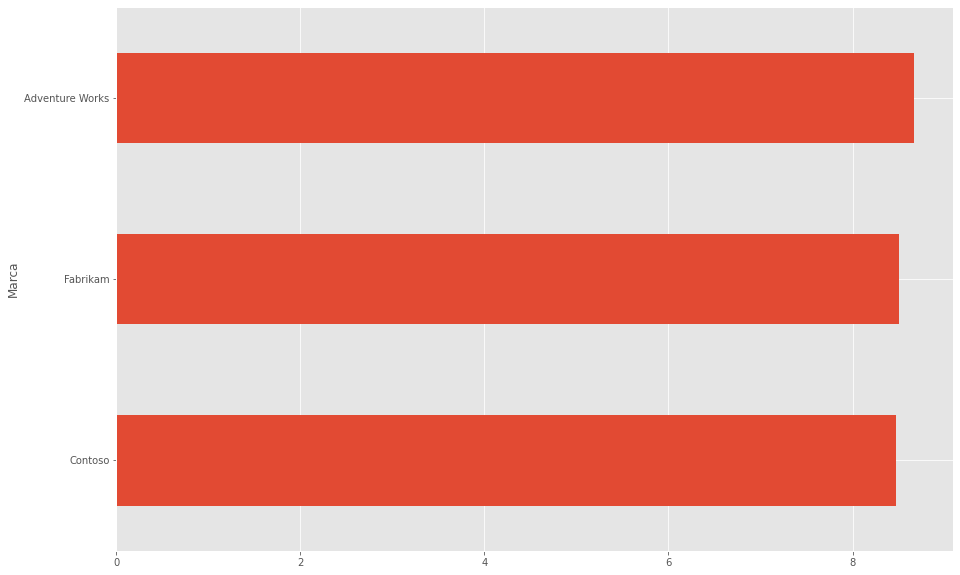

In [98]:
dfAW.groupby("Marca")["Tempo_env"].mean().sort_values(ascending=True).plot.barh();

### Analisando  o lucro anual de cada marca


In [106]:
#Calculando o lucro (Receita - Custo)
dfAW["lucro_venda"]  = dfAW["Valor Venda"] - dfAW["custo_tot"] 
dfAW.groupby([dfAW["Data Venda"].dt.year, "Marca"])["lucro_venda"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro_venda, dtype: float64

In [114]:
pd.options.display.float_format = '{:15,.2f}'.format
dfAW.groupby([dfAW["Data Venda"].dt.year, "Marca"])["lucro_venda"].sum()

Data Venda  Marca          
2008        Adventure Works        306,641.16
            Contoso                 56,416.00
            Fabrikam             1,557,020.55
2009        Adventure Works        405,395.08
            Contoso                138,258.95
            Fabrikam             1,034,091.35
Name: lucro_venda, dtype: float64

## Quais os 3 produtos campeões de vendas

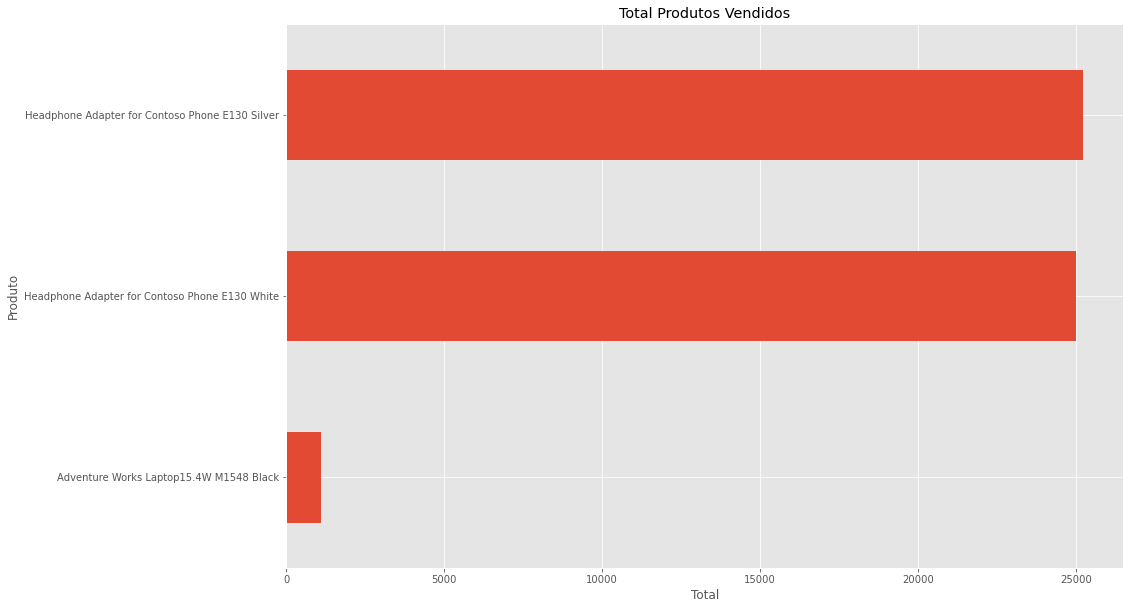

In [123]:
#Mostrando os 3 produtos que mais vendem
dfAW.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).tail(3).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

## Quais os 4 piores produtos em quantidade de vendas

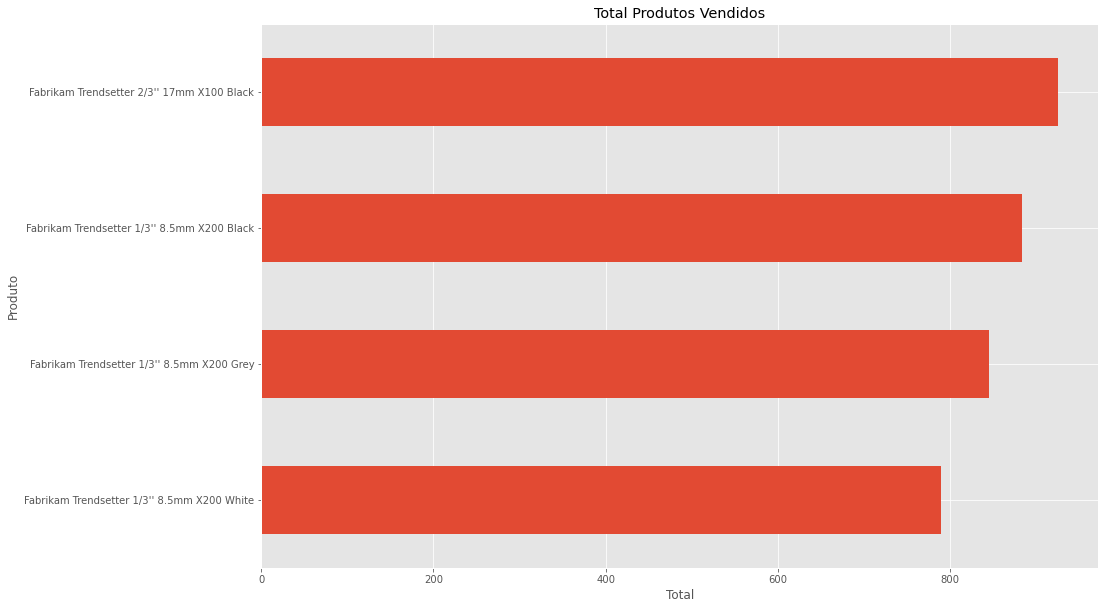

In [122]:
#Mostrando os 7 produtos que mais vendem
dfAW.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).head(4).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

### Analisando o lucro total de cada marca

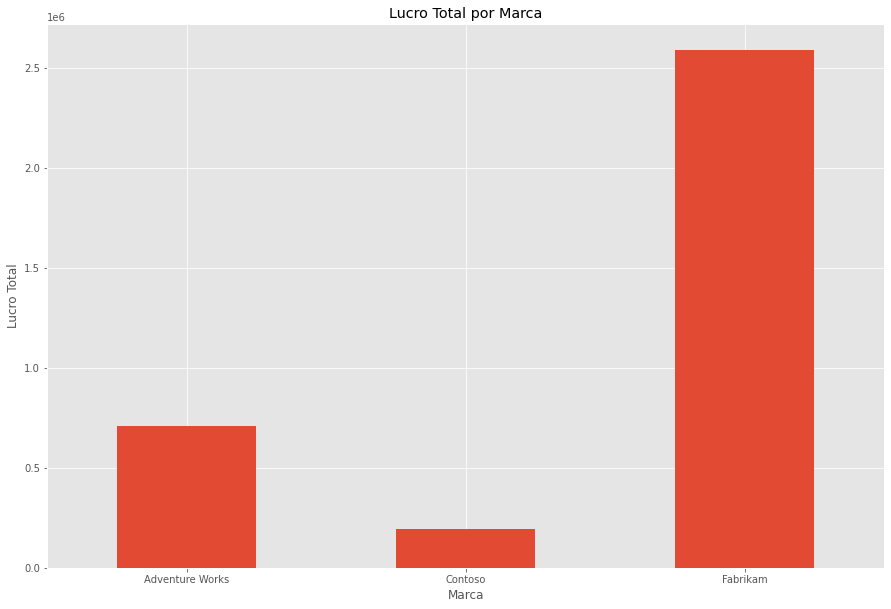

In [126]:
dfAW.groupby("Marca")["lucro_venda"].sum().plot.bar(title="Lucro Total por Marca")
plt.xlabel("Marcas")
plt.ylabel("Lucro Total")
plt.xticks(rotation='horizontal');

### Analisando o lucro total agrupado por tipo Classe

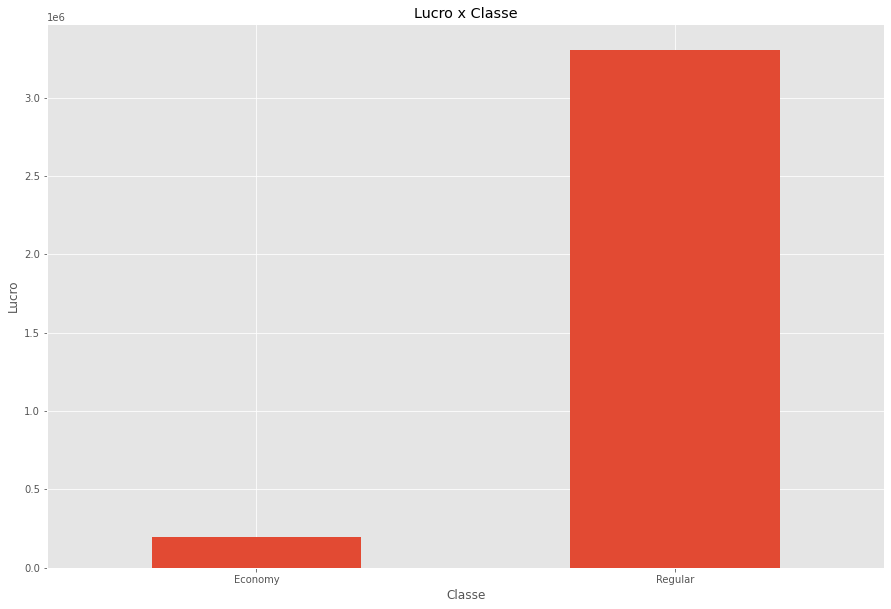

In [135]:
dfAW.groupby("Classe")["lucro_venda"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');


### Analisando o tempo de envio
* Tempo médio
* Tempo mínimo
* Tempo máximo
* Gráfico boxplot

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: Tempo_env, dtype: float64
--------------
Tempo médio:  8.543141592920353
--------------
Menor Tempo:  4
--------------
Maior Tempo:  20
--------------
Gráfico BoxPlot


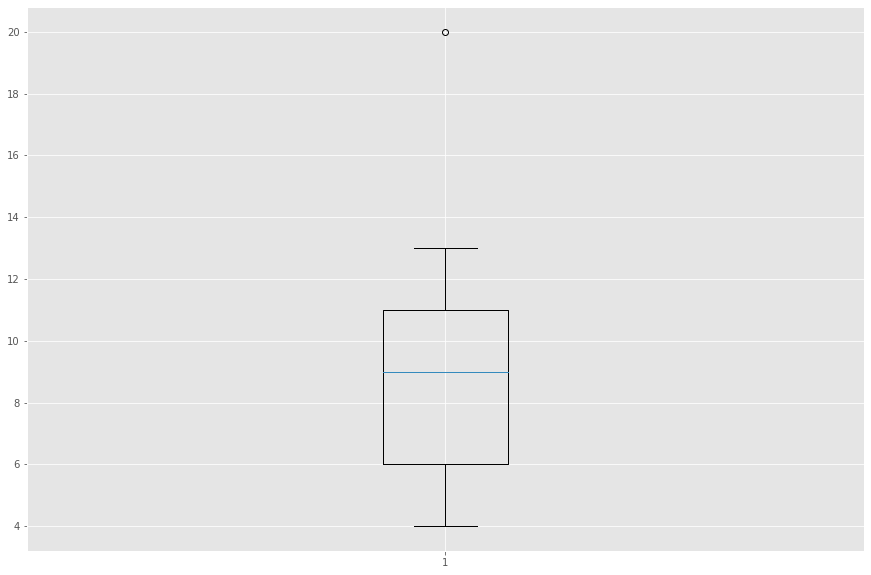

In [142]:
print(dfAW["Tempo_env"].describe())
print('--------------')
print('Tempo médio: ',dfAW["Tempo_env"].mean())
print('--------------')
print('Menor Tempo: ',dfAW["Tempo_env"].min())
print('--------------')
print('Maior Tempo: ',dfAW["Tempo_env"].max())
print('--------------')
print('Gráfico BoxPlot')
plt.boxplot(dfAW["Tempo_env"]);

In [143]:
#analisando o outliler
dfAW[dfAW.Tempo_env == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo_tot,Tempo_env,lucro_venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,20,2456.52


In [145]:
#exportando para uma possivel análise futura
dfAW.to_csv("../datasets/dfAW_tratado.csv", index=False)